# Notebook 3 do Projeto 1 do PB Ciência de Dados da Compass UOL
#### Autora: Amanda Mota Passos
Neste notebook, serão respondidas as perguntas 1 a 5 do desafio.
As variáveis _id serão utilizadas para conectar tabelas diferentes, mas não serão analisadas pois não possuem significado além da identificação.

## 1. Importando pandas, plotly e seaborn

In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns

##### Aviso: todos os gráficos plotados com a biblioteca plotly não aparecem no github no output dos códigos, então a imagem destes gráficos está logo abaixo de cada código em células markdown

## 2. Lendo as tabelas 

In [2]:
sellers = pd.read_csv("C:\\Users\\amand\\Downloads\\repositório do projeto\\tables\\sellers_treated.csv")
products = pd.read_csv("C:\\Users\\amand\\Downloads\\repositório do projeto\\tables\\products_treated.csv")
order_reviews = pd.read_csv("C:\\Users\\amand\\Downloads\\repositório do projeto\\tables\\order_reviews_treated.csv")
orders = pd.read_csv("C:\\Users\\amand\\Downloads\\repositório do projeto\\tables\\orders_treated.csv")
order_payments = pd.read_csv("C:\\Users\\amand\\Downloads\\repositório do projeto\\tables\\order_payments_treated.csv")
order_items = pd.read_csv("C:\\Users\\amand\\Downloads\\repositório do projeto\\tables\\order_items_treated.csv")
geolocation = pd.read_csv("C:\\Users\\amand\\Downloads\\repositório do projeto\\tables\\geolocation_treated.csv", encoding="latin-1")
customers = pd.read_csv("C:\\Users\\amand\\Downloads\\repositório do projeto\\tables\\customers_treated.csv")

## 3. Respostas das perguntas 1 a 5 do desafio

#### 1. Quais são as categorias com maior e menor receita dos últimos 12 meses?

Para responder à esta pergunta, será feito um merge primeiramente entre as tabelas order_payments e order_items, por meio do order_id. Após isso, esta tabela sofrerá um merge com a tabela orders por meio do order_id. Isto será feito para termos acesso à coluna order_purchase_timestamp. Depois isso, será feito o merge entre esta tabela resultante com a tabela products por meio do product_id. Este processo foi feito porque não há como fazer o merge diretamente entre as tabelas order_payments e orders com a tabela products, pois elas não possuem colunas em comum, logo, é necessário utilizar uma tabela intermediária (order_items) para conectá-las.

In [3]:
order_items_and_payments = pd.merge(order_items, order_payments, on = ['order_id'], how="left") #foi feito um left join
#pois a tabela order_items possui menos linhas e colunas que a order_payments

Merge entre order_items_and_payments e orders

In [4]:
orders_i_p = pd.merge(orders,order_items_and_payments, on =["order_id"], how="left")

In [5]:
orders_i_p["order_purchase_timestamp"] = pd.to_datetime(orders_i_p["order_purchase_timestamp"])

#Convertendo a coluna order_purchase_timestamp de str para datetime

Agora, fazendo o último merge:

In [6]:
payments_and_products = pd.merge(products,orders_i_p, on=['product_id'], how="left")

Agora, vamos pegar a data do último pedido e subtrair 12 meses.

In [7]:
orders_i_p["order_purchase_timestamp"].max()

Timestamp('2018-10-17 17:30:18')

In [8]:
from datetime import datetime
data = '2017/10/17 00:00'
data_new = datetime.strptime(data, '%Y/%m/%d %H:%M')

Agora, vamos localizar na tabela payments_and_products os pedidos feitos no período de interesse e criar um novo dataframe chamado data_limite

In [9]:
data_limite = payments_and_products.loc[(orders_i_p["order_purchase_timestamp"]) >= data_new]

Agora vamos agrupar por categoria e ordenar pela soma dos valores dos pagamentos

In [10]:
soma_payments=data_limite.groupby(['product_category_name'])["payment_value"].sum().reset_index()
#Agrupamento por categoria e por ano, somando os valores dos pagamentos.
soma_payments

,product_category_name,payment_value
0,agro_industria_e_comercio,1893.15
1,alimentos,21314.85
2,alimentos_bebidas,11117.52
3,artes,9758.47
4,artes_e_artesanato,565.66
...,...,...
67,sinalizacao_e_seguranca,8642.38
68,tablets_impressao_imagem,5463.14
69,telefonia,151237.48
70,telefonia_fixa,11026.38


In [11]:
soma_payments.sort_values(by="payment_value", ascending=False).head() #Ordenando os valores de pagamentos de modo decrescente,
# a fim de verificar o maior

,product_category_name,payment_value
13,cama_mesa_banho,643760.99
11,beleza_saude,444889.19
44,informatica_acessorios,408357.78
32,esporte_lazer,372523.12
53,moveis_decoracao,365482.16


Logo, a categoria com maior receita nos últimos 12 meses foi cama_mesa_banho, com R$643.760,99.

In [12]:
soma_payments.sort_values(by="payment_value",ascending=True).head() #Ordenando os valores de pagamentos de modo crescente,
# a fim de verificar o menor

,product_category_name,payment_value
66,seguros_e_servicos,0.00
60,pcs,0.00
46,la_cuisine,163.25
64,portateis_cozinha_e_preparadores_de_alimentos,382.68
4,artes_e_artesanato,565.66


Logo, a categoria com menor receita nos últimos 12 meses foi seguros_e_servicos, com R$0.00.

In [33]:
hist_cat=px.histogram(soma_payments.sort_values(by="payment_value", ascending=False).head(20), x="product_category_name", y="payment_value")
hist_cat.update_layout(width=500,height=500,title_text='Receita por categoria de produto nos últimos 12 meses',
                      title_font_color = 'blue')
hist_cat.show()
#Histograma que representa visualmente os resultados encontrados acima

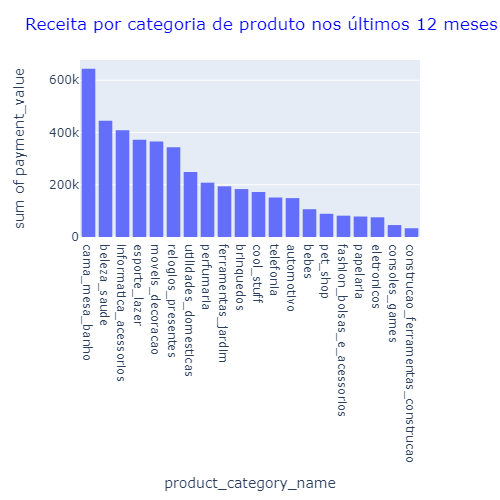

#### 2. Top 10 maiores sellers

Como foi feito para a pergunta anterior, serão também realizados alguns merges entre tabelas. O primeiro merge será entre as tabelas sellers e order_items por meio do seller_id. Depois, a tabela resultante sofrerá merge com a tabela order_payments por meio do order_id. Isso acontecerá pois as tabelas sellers e order_payments não possuem colunas em comum que possibilitem conectá-las diretamente.

In [17]:
sellers_items=pd.merge(sellers, order_items, on=["seller_id"], how="left")

In [18]:
sellers_items_payments=pd.merge(sellers_items, order_payments, on=["order_id"], how="left")

In [19]:
soma_sellers_payments=sellers_items_payments.groupby(['seller_id'])["payment_value"].sum().reset_index()

In [20]:
soma_sellers_payments.sort_values(by="payment_value",ascending=False).head(10)

,seller_id,payment_value
881,4a3ca9315b744ce9f8e9374361493884,230686.90
368,1f50f920176fa81dab994f9023523100,195287.54
2643,da8622b14eb17ae2831f4ac5b9dab84a,172523.61
1235,6560211a19b47992c3666cc44a7e94c0,169247.91
857,4869f7a5dfa277a7dca6462dcf3b52b2,167038.84
1505,7a67c85e85bb2ce8582c35f2203ad736,154489.59
192,1025f0e2d44d7041d6cf58b6550e0bfa,153949.13
2481,cc419e0650a3c5ba77189a1882b7556a,135350.94
1824,955fee9216a65b617aa5c0531780ce60,128958.60
731,3d871de0142ce09b7081e2b9d1733cb1,108814.45


O top 10 maiores sellers (maior receita) são os de seguintes seller_ids:

4a3ca9315b744ce9f8e9374361493884    
1f50f920176fa81dab994f9023523100    
da8622b14eb17ae2831f4ac5b9dab84a    
6560211a19b47992c3666cc44a7e94c0    
4869f7a5dfa277a7dca6462dcf3b52b2    
7a67c85e85bb2ce8582c35f2203ad736    
1025f0e2d44d7041d6cf58b6550e0bfa    
cc419e0650a3c5ba77189a1882b7556a    
955fee9216a65b617aa5c0531780ce60    
3d871de0142ce09b7081e2b9d1733cb1 

#### 3. Top 10 menores sellers

In [21]:
soma_sellers_payments.sort_values(by="payment_value",ascending=True).head(10)

,seller_id,payment_value
0,0015a82c2db000af6aaaf3ae2ecb0532,0.0
1612,834f3294fba9f932f56edc879193f925,0.0
1622,83d7070a0b9a8b4625fa8682b819fabb,0.0
364,1e9d5a33694bddb76316fd1f54734d20,0.0
615,33dd941c27854f7625b968cc6195a552,0.0
1633,850857dfac77488c307e2b1cbd84ab5a,0.0
1644,8603f0038fe0e52fedd3382d266723de,0.0
1651,86bb7c4b535e49a541baf3266b1c95b1,0.0
223,134b867a0f7f8bbe6abf10f91874891e,0.0
1657,8759e7aedd644f487315e5860962f162,0.0


O top 10 menores sellers (menor receita) são os de seguintes seller_ids:
    
0015a82c2db000af6aaaf3ae2ecb0532    
834f3294fba9f932f56edc879193f925    
83d7070a0b9a8b4625fa8682b819fabb    
1e9d5a33694bddb76316fd1f54734d20    
33dd941c27854f7625b968cc6195a552    
850857dfac77488c307e2b1cbd84ab5a    
8603f0038fe0e52fedd3382d266723de    
86bb7c4b535e49a541baf3266b1c95b1    
134b867a0f7f8bbe6abf10f91874891e    
8759e7aedd644f487315e5860962f162    

In [34]:
hist_sel=px.histogram(soma_sellers_payments.sort_values(by="payment_value",ascending=False).head(20), x="seller_id", y="payment_value")
hist_sel.update_layout(width=500,height=500,title_text='Receita por vendedor',
                      title_font_color = 'blue',)
hist_sel.show()
#Histograma que representa visualmente os resultados encontrados acima

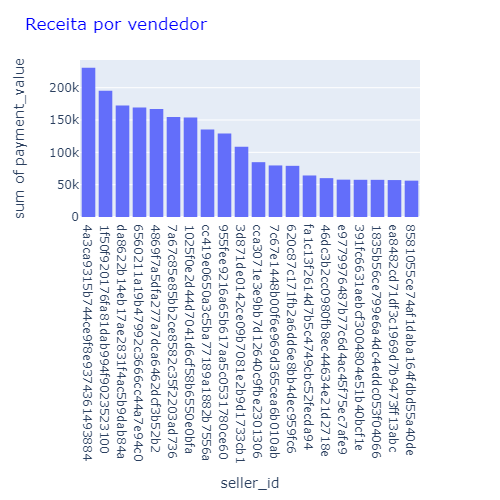

#### 4. Existem sellers que vendem o mesmo produto? Se sim, quais são? Qual é a variação de preço praticado entre os sellers?

Vamos responder estas perguntas criando dicionários aninhados. O dicionário de fora possui como chave o product_id, e seu valor é um dicionário que possui como chave o seller_id e como valor o preço do produto. 
Ao criar estes dicionários, é possível visualizar cada produto e, dentro dele, cada vendedor que o vende e por quanto. Depois, foi feito um filtro e criou-se um dicionário com apenas os produtos vendidos por mais de um seller.

In [27]:
dict_same_product = {}
lista_same = []
for i in order_items_and_payments.itertuples():
    sel = i.seller_id
    prod = i.product_id
    pri = i.price
    if prod in dict_same_product:
        dict_same_product[prod][sel] = pri
    else:
        dict_same_product[prod] = {sel: pri}
        
        

In [28]:
dict_same_product_filter = {}
for key, value in dict_same_product.items():
    if len(value)>=2:
        dict_same_product_filter[key] = value

In [30]:
dict_same_product_filter

{'99a4788cb24856965c36a24e339b6058': {'4a3ca9315b744ce9f8e9374361493884': 89.9,
  '53d00c40e32aeb924a84ce72b1af869d': 86.0},
 '4fa33915031a8cde03dd0d3e8fb27f01': {'fe2032dab1a61af8794248c8196565c9': 144.0,
  '8931a84a914b3fe9b1ddaa4d704947ca': 189.0},
 '5a419dbf24a8c9718fe522b81c69f61a': {'3504c0cb71d7fa48d967e0e4c94d59d9': 44.49,
  'e26901d5ab434ce92fd9b5c256820a4e': 39.9},
 '89321f94e35fc6d7903d36f74e351d40': {'16090f2ca825584b5a147ab24aa30c86': 27.9,
  '7178f9f4dd81dcef02f62acdf8151e01': 59.88},
 '0b0172eb0fd18479d29c3bc122c058c2': {'5656537e588803a555b8eb41f07a944b': 24.89,
  '1838dd9b8977065acf51d95e0053ea7a': 28.9},
 'dbaee28f4ee64465838a229582d77520': {'ffc470761de7d0232558ba5e786e57b7': 54.0,
  '8daab2245ebdc277c51098d01c5ad8ef': 55.9},
 'dbb67791e405873b259e4656bf971246': {'9c0e69c7bf2619675bbadf47b43f655a': 81.99,
  '6973a06f484aacf400ece213dbf3d946': 81.99,
  '00fc707aaaad2d31347cf883cd2dfe10': 79.0,
  'f457c46070d02cadd8a68551231220dd': 88.0,
  'e9bc59e7b60fc3063eb2290deda4

Por meio deste dicionário, podemos observar todos os sellers que vendem o mesmo produto e por qual preço.
Como exemplos, tem-se o produto '69455f41626a745aea9ee9164cb9eafd', que possui estes sellers distintos, cada um com seus respectivos preços:
* 'bce6a5ecf98e99fd2a8868b15c51f04b': 110.0,
* '2eb70248d66e0e3ef83659f71b244378': 136.0,
* '4869f7a5dfa277a7dca6462dcf3b52b2': 178.9,
* 'c60b801f2d52c7f7f91de00870882a75': 150.0,
* '7d13fca15225358621be4086e1eb0964': 185.0,
* '58f1a6197ed863543e0136bdedb3fce2': 128.0,
* 'b33e7c55446eabf8fe1a42d037ac7d6d': 255.0.

e o produto 'be0dbdc3d67d55727a65d4cd696ca73c', que possui estes sellers distintos, cada um com seus respectivos preços:
* '165fc07beebdcb6190fba8a06db2a449': 79.8,
* 'e9bc59e7b60fc3063eb2290deda4cced': 65.0,
* '8e6d7754bc7e0f22c96d255ebda59eba': 79.79,
* '3340ef1913fb70d28420f6ceb685c339': 64.99,
* '9c0e69c7bf2619675bbadf47b43f655a': 79.9.

#### 5. Houve inflação no preço dos produtos ao passar do tempo? Se houve, de quanto foi a variação desta inflação em % e em R$?

Para responder esta pergunta, serão feitos dois dicionários com chaves product_id e valores price. Esses dois dicionários serão definidos da seguinte forma: o primeiro, denominado dict_product_price1 terá os preços dos produtos do primeiro ano de vendas da base de dados (04-09-2016 a 04-09-2017) e o segundo, dict_product_price2, terá os preços dos produtos do segundo ano - que, aqui nesta análise, vai de 05-09-2017 a 17-10-2018. Depois, será feita uma comparação pelas chaves (product_ids) destes dois dicionários e, se houver o mesmo produto nos dois períodos de tempo, a diferença em R$ entre os preços será adicionada ao dicionário dict_diff e a diferença em % será adicionada ao dicionário dict_div, ambas sob as chaves product_id para manter a identificação.

In [23]:
orders_i_p["order_purchase_timestamp"].min() #verificando a menor data

Timestamp('2016-09-04 21:15:19')

In [24]:
orders_i_p["order_purchase_timestamp"].max() #verificando a maior data

Timestamp('2018-10-17 17:30:18')

In [25]:
primeiro_ano = orders_i_p.loc[(orders_i_p["order_purchase_timestamp"] <= "2017-09-04")] #separando a tabela pela data

In [26]:
segundo_ano = orders_i_p.loc[(orders_i_p["order_purchase_timestamp"] > "2017-09-04")] #separando a tabela pela data

In [27]:
dict_product_price1 = {} 

for i in primeiro_ano.itertuples():
    prod = i.product_id
    pri = i.price
    dict_product_price1[prod] = pri
    
#dicionário primeiro ano

In [28]:
dict_product_price1

{'060cb19345d90064d1015407193c233d': 147.9,
 'a1804276d9941ac0733cfd409f5206eb': 49.9,
 '4520766ec412348b8d4caa5e8a18c464': 40.0,
 'ac1789e492dcd698c5c10b97a671243a': 19.9,
 '9a78fb9862b10749a117f7fc3c31f051': 149.96,
 nan: nan,
 'f7e0fa615b386bc9a8b9eb52bc1fff76': 85.0,
 '0cd9f302c8a5b076ffa5c3567c6705fd': 27.9,
 'cd935d283d47f1050c505e1c39c48b67': 69.9,
 'e251ebd2858be1aa7d9b2087a6992580': 99.9,
 'ba4bfbf74dbe7ab37e263b9326da0523': 36.9,
 'f35927953ed82e19d06ad3aac2f06353': 115.0,
 'ebd7c847c1e1cb69ec374ae0ebee1f4c': 84.9,
 '30469bb5ea377eae7121981e2f0778e4': 113.0,
 '69d980b4120a76616d7b237d731d6156': 219.0,
 '154e7e31ebfa092203795c972e5804a6': 19.99,
 'f497ba62f1d6b4f6a3a3266fa8623ad3': 58.2,
 'b3be1f83cef05668c25e134852d44545': 110.99,
 'f7d7b5c58704fb359a74580622800051': 38.5,
 '22f5b63060a1185e5ec7721efd622321': 14.82,
 'c1234c80dafde7ef3311b3eabd5069ed': 17.9,
 'f9a7825fa51f487b8a48f67e9efced8c': 29.9,
 'e0d64dcfaa3b6db5c54ca298ae101d05': 185.0,
 '42a2c92a0979a949ca4ea89ec5c7b9

In [29]:
dict_product_price2 = {}

for i in segundo_ano.itertuples():
    prod = i.product_id
    pri = i.price
    dict_product_price2[prod] = pri
    
#dicionário segundo ano

In [30]:
dict_product_price2

{'87285b34884572647811a353c7ac498a': 29.99,
 '595fac2a385ac33a80bd5114aec74eb8': 142.5,
 'aa4383b373c6aca5d8797843e5594415': 158.9,
 'd0b61bfb1de832b15ba9d266ca96e5b0': 36.0,
 '65266b2da20d04dbe00c5c2d3bb7859e': 19.9,
 '72a97c271b2e429974398f46b93ae530': 31.9,
 '10adb53d8faa890ca7c2f0cbcb68d777': 19.9,
 '72d3bf1d3a790f8874096fcf860e3eff': 38.25,
 '009c09f439988bc06a93d6b8186dce73': 132.4,
 nan: nan,
 'a47295965bd091207681b541b26e40a5': 27.99,
 'cce679660c66e6fbd5c8091dfd29e9cd': 17.9,
 'c35498fbb4358837ae16850f50c3fd22': 76.0,
 '5ac9d9e379c606e36a8094a6046f75dc': 109.9,
 '2b4609f8948be18874494203496bc318': 89.99,
 '6893767814d1ac82a81bcd365e1cc918': 9.5,
 'e99d69efe684efaa643f99805f7c81bc': 89.9,
 '7b717060aa783eb7f23a747a3a733dd7': 139.9,
 '00baba5b58e274d0332a0c8a0a66f877': 47.9,
 'ba74c6b75d2ad7503175809688d5a03c': 178.99,
 '6b64362e89896be7589621df54be089e': 49.0,
 '39a9942865c056ed2006a5e8c11d9537': 84.9,
 'c6c1f263e076bd9c1f1640250a5d0c29': 179.0,
 'bff2010b28e8fbcff5a9db9d3fea5a

In [31]:
import math
dict_diff = {}
dict_div = {}
for i in dict_product_price1:
    if i in dict_product_price2:
        if not math.isnan(dict_product_price2[i]):
            dict_diff[i] = (dict_product_price1[i] - dict_product_price2[i])
            dict_div[i] = ((dict_product_price1[i]/dict_product_price2[i])*100)
    else:
        continue
#fazendo as comparações em R$ e em % e adicionando aos respectivos dicionários

In [32]:
dict_diff

{'060cb19345d90064d1015407193c233d': 0.0,
 'a1804276d9941ac0733cfd409f5206eb': 0.0,
 '4520766ec412348b8d4caa5e8a18c464': 12.510000000000002,
 '9a78fb9862b10749a117f7fc3c31f051': -10.030000000000001,
 'f7e0fa615b386bc9a8b9eb52bc1fff76': -13.0,
 'cd935d283d47f1050c505e1c39c48b67': 0.0,
 'ba4bfbf74dbe7ab37e263b9326da0523': 3.0,
 'f35927953ed82e19d06ad3aac2f06353': 0.0,
 '30469bb5ea377eae7121981e2f0778e4': -26.900000000000006,
 '154e7e31ebfa092203795c972e5804a6': -4.0,
 'f497ba62f1d6b4f6a3a3266fa8623ad3': 0.0,
 'f9a7825fa51f487b8a48f67e9efced8c': 0.0,
 'e0d64dcfaa3b6db5c54ca298ae101d05': -24.99000000000001,
 '42a2c92a0979a949ca4ea89ec5c7b934': 1.0,
 'aba86c093ccdbac75b09111d57e50004': 5.0,
 '04a4e9d8c0dc6b2b4b8e24ea78a8f318': 0.0,
 '4bb4fb9c85785b75ab4f6559900c7ca1': 0.0,
 '1dceebcc5f23c02ea23e16d5bedca000': -20.0,
 '617186c3d97ea56c9c683a8a3974e8c1': 0.0,
 '283dc451ad3918badb976d56ff887289': -10.0,
 'a35a9f46dcee0a67c8c7ad8493eb4135': -11.0,
 '23384f296aa1bf6461d22912093a9847': 0.01000000

Este dicionário mostra a diferença, em R$, dos valores de cada produto entre o primeiro ano (04-09-2016 a 04-09-2017) e o segundo ano (05-09-2017 a 17-10-2018).

In [33]:
dict_div

{'060cb19345d90064d1015407193c233d': 100.0,
 'a1804276d9941ac0733cfd409f5206eb': 100.0,
 '4520766ec412348b8d4caa5e8a18c464': 145.50745725718443,
 '9a78fb9862b10749a117f7fc3c31f051': 93.73085817863617,
 'f7e0fa615b386bc9a8b9eb52bc1fff76': 86.73469387755102,
 'cd935d283d47f1050c505e1c39c48b67': 100.0,
 'ba4bfbf74dbe7ab37e263b9326da0523': 108.84955752212389,
 'f35927953ed82e19d06ad3aac2f06353': 100.0,
 '30469bb5ea377eae7121981e2f0778e4': 80.77197998570406,
 '154e7e31ebfa092203795c972e5804a6': 83.32638599416423,
 'f497ba62f1d6b4f6a3a3266fa8623ad3': 100.0,
 'f9a7825fa51f487b8a48f67e9efced8c': 100.0,
 'e0d64dcfaa3b6db5c54ca298ae101d05': 88.09943330634792,
 '42a2c92a0979a949ca4ea89ec5c7b934': 101.69779286926995,
 'aba86c093ccdbac75b09111d57e50004': 104.3630017452007,
 '04a4e9d8c0dc6b2b4b8e24ea78a8f318': 100.0,
 '4bb4fb9c85785b75ab4f6559900c7ca1': 100.0,
 '1dceebcc5f23c02ea23e16d5bedca000': 69.23076923076923,
 '617186c3d97ea56c9c683a8a3974e8c1': 100.0,
 '283dc451ad3918badb976d56ff887289': 89.9

Este dicionário mostra a diferença, em %, dos valores de cada produto entre o primeiro ano (04-09-2016 a 04-09-2017) e o segundo ano (05-09-2017 a 17-10-2018).

Logo, houve inflação nos preços dos produtos, mas também houve deflação, como pode ser observado nos dois dicionários

As respostas do desafio continuam no notebook3.1, devido ao fato de que, com todas as respostas em um só notebook, foi ultrapassado o limite do que o Github conseguia mostrar.